<a href="https://colab.research.google.com/github/SandeepMLDLNPL/Machine_Learning_Models/blob/main/In_Depth_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1,cache = True,as_frame = False)
mnist.target = mnist.target.astype(np.int8)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
def sort_by_target(mnist):
  reorder_train = np.array(sorted([(target,i) for i,target in enumerate(mnist.target[:60000])]))[:,1]
  reorder_test = np.array(sorted([(target,i) for i,target in enumerate(mnist.target[60000:])]))[:,1]
  mnist.data[:60000] = mnist.data[reorder_train]
  mnist.target[:60000] = mnist.target[reorder_train]
  mnist.data[60000:] = mnist.data[reorder_test+60000]
  mnist.target[60000:] = mnist.target[reorder_test+60000]

In [4]:
sort_by_target(mnist)

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
X,y = mnist["data"],mnist['target']
X.shape,y.shape

((70000, 784), (70000,))

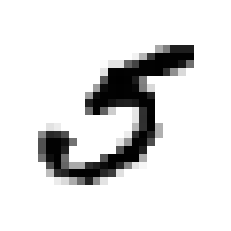

In [7]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [8]:
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image,cmap = mpl.cm.binary,interpolation='nearest')
  plt.axis('off')
  plt.show()

In [9]:
y[36000]

5

In [10]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [11]:
y_train_5 = (y_train == 5)
y_test_5  = (y_test == 5)
y_train_5

array([False, False, False, ...,  True, False, False])

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5,random_state = 42)
sgd_clf.fit(X_train,y_train_5)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5, random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv = 3,scoring = 'accuracy')

array([0.9624, 0.9558, 0.9544])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train,cv = 3)

In [17]:
y_train_pred = (y_train_pred ==5)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[54401,   178],
       [ 2088,  3333]])

In [19]:
y_train_perfect_prediction = y_train_5
confusion_matrix( y_train_5,y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]])

In [20]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred,pos_label='positive'
                                           ,average='micro')

0.9622333333333334

In [21]:
recall_score(y_train_5,y_train_pred)

0.6148312119535141

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7463054187192117

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([66232.62416171])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [25]:
threshold = 200000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [27]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method = 'decision_function')

In [29]:
y_scores.shape

(60000,)

In [30]:
if y_scores.ndim ==2 :
  y_scores = y_scores[:,1]

In [32]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)
precisions,recalls,thresholds

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-3437974.6333548 , -3099659.27596796, -3073782.12493436, ...,
          966822.34791086,  1003147.20565624,  1020030.22497475]))

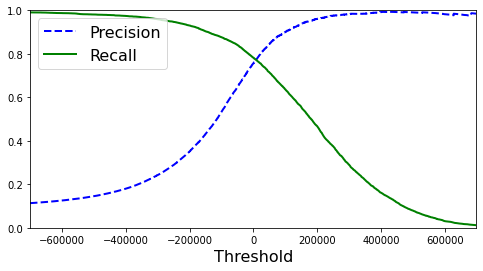

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [36]:
(y_train_pred == (y_scores>0)).all

<function ndarray.all>

In [37]:
y_train_pred_90 = (y_scores > 7000)
precision_score(y_train_5,y_train_pred_90)


0.7691462074019787

In [38]:
recall_score(y_train_5,y_train_pred_90)

0.7743958679210478

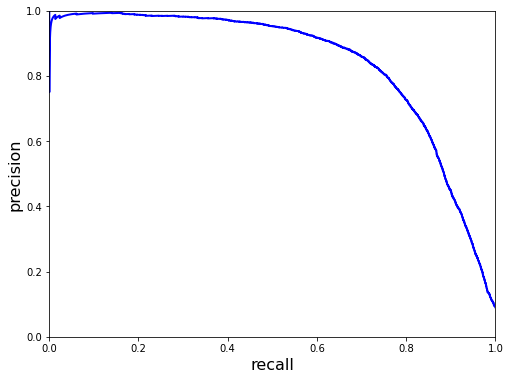

In [40]:
def precision_vs_recall_curve(precisions,recalls):
  plt.plot(recalls,precisions,'b-',linewidth = 2)
  plt.xlabel('recall',fontsize = 16)
  plt.ylabel('precision',fontsize = 16)
  plt.axis([0,1,0,1])
plt.figure(figsize = (8,6))
precision_vs_recall_curve(precisions,recalls)
plt.show()

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

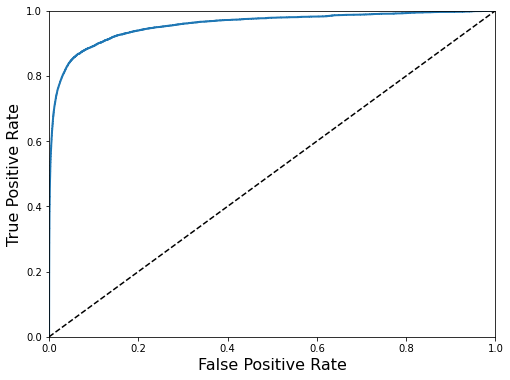

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9568388855967642

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10,random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method = 'predict_proba')

In [46]:
y_score_forest = y_probas_forest[:,-1]
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_5,y_score_forest)

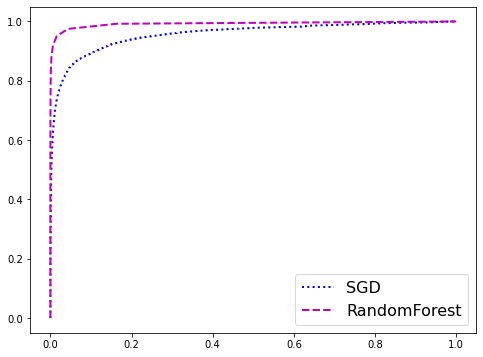

In [51]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,'b:', linewidth=2,label = 'SGD')
plt.plot(fpr_forest,tpr_forest,'m--',linewidth=2,label='RandomForest')
plt.legend(loc='lower right',fontsize = 16)
plt.show()

In [52]:
roc_auc_score(y_train_5,y_score_forest)

0.9922689131377586

In [53]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9872218550341485

In [54]:
recall_score(y_train_5,y_train_pred_forest)

0.8266002582549346

##Multiclass

In [55]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [56]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score

array([[-163216.55233345, -466766.67178514, -363969.87939397,
        -186727.80387754, -489544.98326004,   -8336.70851915,
        -747004.78107329, -331437.67625892, -672826.61858272,
        -688019.48283952]])

In [57]:
np.argmax(some_digit_score)

5

In [58]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [61]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter = 5,random_state = 42))

In [62]:
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [63]:
len(ovo_clf.estimators_)

45

In [64]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [65]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring = 'accuracy')

array([0.86815, 0.86605, 0.85905])

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [67]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring = 'accuracy')

array([0.91   , 0.90985, 0.9089 ])

In [68]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
confu_matrix = confusion_matrix(y_train,y_train_pred)

In [69]:
confu_matrix

array([[5728,    2,   19,   11,   10,   56,   42,    9,   43,    3],
       [   1, 6442,   50,   33,    6,   37,    9,   14,  140,   10],
       [  58,   42, 5309,  112,   78,   22,   95,   66,  162,   14],
       [  51,   43,  135, 5372,    3,  206,   37,   59,  134,   91],
       [  24,   29,   36,    9, 5370,    7,   56,   29,   81,  201],
       [  79,   40,   29,  199,   77, 4594,  106,   26,  176,   95],
       [  38,   28,   46,    2,   46,   96, 5598,    7,   56,    1],
       [  20,   20,   69,   33,   52,    9,    6, 5806,   19,  231],
       [  51,  140,   67,  155,   15,  144,   60,   27, 5048,  144],
       [  44,   33,   26,   84,  158,   28,    3,  192,   73, 5308]])

In [71]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [72]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9771998727719389